In [2]:
!wget https://raw.githubusercontent.com/rewerc/raw-files/main/insurance.csv

--2022-06-19 14:34:30--  https://raw.githubusercontent.com/rewerc/raw-files/main/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2022-06-19 14:34:31 (4.22 MB/s) - ‘insurance.csv.1’ saved [54288/54288]



In [4]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df_oh = pd.get_dummies(df)
df_oh

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [13]:
X = df_oh.drop(["charges"], axis=1)
y = df_oh["charges"]
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    shuffle=True)
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1118,33,35.750,1,0,1,0,1,0,0,1,0
832,28,23.845,2,1,0,1,0,0,1,0,0
490,19,32.900,0,1,0,1,0,0,0,0,1
662,32,31.540,1,1,0,1,0,1,0,0,0
80,31,26.885,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
894,62,32.110,0,0,1,1,0,1,0,0,0
757,47,27.830,0,1,0,0,1,0,0,1,0
1317,18,53.130,0,0,1,1,0,0,0,1,0
646,39,26.220,1,0,1,1,0,0,1,0,0


In [19]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
history = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8880.9473 - mae: 8880.9473
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7947.3628 - mae: 7947.3628
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7820.4287 - mae: 7820.4287
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7781.7832 - mae: 7781.7832
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7764.2617 - mae: 7764.2617
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7701.7466 - mae: 7701.7466
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7807.4067 - mae: 7807.4067
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7756.8213 - mae: 7756.8213
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7737.6606 - mae: 7737.6606
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7680.2861 - mae: 7680.2861

In [24]:
model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5455.8799 - mae: 5455.8799


[5455.8798828125, 5455.8798828125]

## Model 1: 
Evaluation: loss=5455

In [38]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [41]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               1200      
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4302.6089 - mae: 4302.6089


[4302.60888671875, 4302.60888671875]

Text(0, 0.5, 'epochs')

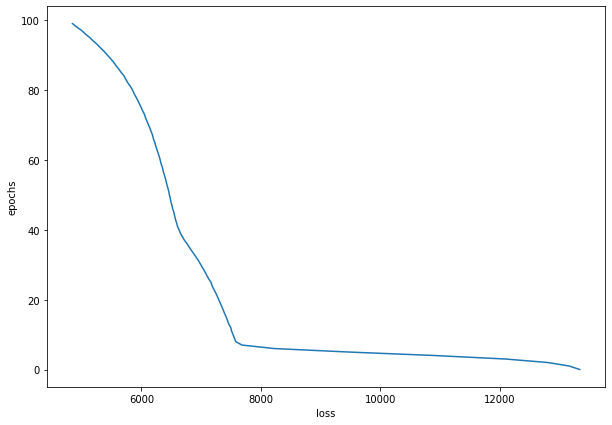

In [40]:
plt.figure(figsize=(10, 7))
plt.plot(history_2.history["loss"], np.arange(0, 100))
plt.xlabel("loss")
plt.ylabel("epochs")

## Model 2:
Evaluation: loss=4302 (improved)
> **Use the early stopping callback to stop epochs when there isn't any improvement**

In [54]:
# with normalization of weights (age, bmi, children) with MinMax scaler method
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [51]:
# ct is a tool to transform the dataset (in a pipeline)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"])
)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_train_normal[0]

#FAILED
#OneHotEncoding needs to happen inside the pipeline else the normalized data won't be complete

array([0.19565217, 0.11155106, 0.6       ])

In [52]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X, y = [df.drop(["charges"], axis=1), df["charges"]]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True)
ct.fit(X_train)
X_train_normal = tf.constant((ct.transform(X_train)), dtype=tf.float32)
X_test_normal = tf.constant(ct.transform(X_test), dtype=tf.float32)
X_train_normal[0]

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([0.3043478, 0.4180791, 0.2      , 0.       , 1.       , 1.       ,
       0.       , 0.       , 0.       , 0.       , 1.       ],
      dtype=float32)>

In [92]:
EPOCHS = 300
model_3_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_3 = model_3.fit(X_train_normal, y_train, epochs=EPOCHS, verbose=0)

In [93]:
model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3426.6157 - mae: 3426.6157


[3426.61572265625, 3426.61572265625]

In [94]:
model_3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 100)               1200      
                                                                 
 dense_47 (Dense)            (None, 10)                1010      
                                                                 
 dense_48 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

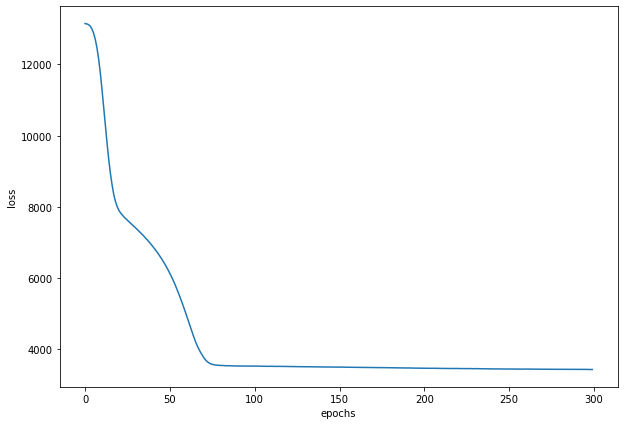

In [95]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(0, len(history_3.history["loss"])), history_3.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")